## Capstone Project - The Battle of Neighborhoods
Course:      Coursera - Applied Data Science Capstone <BR>
Made by:   Fernando Luiz Baptista Pinto

## Question 1 - Description of the problem

São Paulo is one of the main cities in Brazil in terms of local culture, leisure and fun options. A scene of the most comprehensive and diverse culture in the country. A tourist hub where people from all over the country come to watch music, theater, museums and parks


#### Problem:

Despite having several cultural options in the city, there is a concentration of these options in certain more central districts and greater economic power, leaving a large portion of the population who have less resources to use for leisure and culture, especially those who live in the outskirts of the city. without many cultural options near their homes.

#### Objective of the work:

The purpose of this paper is to demonstrate the differences in culture options between some districts of the city, using the analysis tools presented in these courses, and how this can be useful for the São Paulo City Public Agencies, responsible for taking care of cultural activities.  can focus and more efficiently direct their resources to the neediest areas of the city.


## Question 2 - Description of the data

For this work the following data source was used:

<b>City of São Paulo City Hall website.</b><BR>
Geographic and population information about the districts and neighborhoods of the city.<BR>
https://www.prefeitura.sp.gov.br/cidade/secretarias/subprefeitura/subprefeitura/dados_demograficos/index.php?p=12758
<BR>These data were used to identify and select some districts for our work.

<b>foursquare.com</b> <BR>
was used for inquiries regarding establishments registered on the foursquare.com website
The data were accessed via API (REST) and used to identify establishments that are interesting from the point of view of this work.
Unfortunately, foursquare is not widely used in Brazil, the database is very small and not updated often.

## 3 - Methodology

Select 6 districts belonging to the city of Sao Paulo, which have different characteristics of population and region of the city where they are located. <BR>
Identify among Foursquare data which Venues are relevant to this study.<BR>
Analyze individually given district chosen.<BR>
Analyze and compare data between chosen districts.


##  4 - Results

study execution details


##### Import Libraries

In [1]:
import requests 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import json 

from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge geocoder --yes 
import geocoder 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


##### Import Data from City of São Paulo

In [2]:
##neighborhoods = pd.read_csv('Borough.csv', delimiter=",")
neighborhoods = pd.read_csv('https://raw.githubusercontent.com/flbpinto/CapstoneProject/master/Borough.csv', delimiter=",") 
    
neighborhoods = pd.DataFrame(neighborhoods, columns = ['ID', 'Borough', 'lat', 'lng', 'address'])

x = neighborhoods.ID.count()    
i = 0
while  i < x :
    neighborhoods.Borough[i]
    neighborhoods.address[i] = neighborhoods.Borough[i] + ', São Paulo, Brasil'
    address    = neighborhoods.address[i]
    geolocator = Nominatim(user_agent="can_explorer")
    try :
        location = geolocator.geocode(address)
        neighborhoods.lat[i]  = location.latitude 
        neighborhoods.lng[i]  = location.longitude
    except : 
        neighborhoods.lat[i]  = 'Not Defined'
        neighborhoods.lng[i]  = 'Not Defined'
        #pass
    i += 1
 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.p

In [3]:
neighborhoods.drop(neighborhoods[(neighborhoods['lat'] == 'Not Defined')].index , inplace=True)
neighborhoods.set_index('ID', inplace=True)
#neighborhoods.head()

In [4]:
#BoroughPop = pd.read_csv('DistritosSaoPaulo.csv', delimiter=",")
BoroughPop = pd.read_csv('https://raw.githubusercontent.com/flbpinto/CapstoneProject/master/DistritosSaoPaulo.csv', delimiter=",")
neighbor = neighborhoods.merge(BoroughPop, left_on= 'Borough', right_on='Distritos')
neighbor.drop(['address', 'Distritos'], axis=1, inplace=True)
neighbor

,Borough,lat,lng,Área,População,Densidade
0,Aricanduva,-23.5726,-46.5183,21.5,267702,12451.00
1,Butantã,-23.5691,-46.7219,56.1,428217,7633.00
2,Campo Limpo,-23.6326,-46.7597,36.7,607105,16542.00
3,Casa Verde,-23.4991,-46.6541,26.7,309376,11587.00
4,Cidade Ademar,-23.6692,-46.6588,30.7,410998,13388.00
5,Cidade Tiradentes,-23.5892,-46.3964,15.0,211501,14100.00
6,Ermelino Matarazzo,-23.4917,-46.4841,15.1,207509,13742.00
7,Freguesia-Brasilândia,-23.4835,-46.6871,31.5,407245,12928.00
8,Guaianases,-23.5557,-46.4093,17.8,268508,15085.00
9,Ipiranga,-23.5893,-46.6062,37.5,463804,12368.00


##### Locating the borhoods in the city

In [5]:
address = 'São Paulo, Brasil'
geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of São Paulo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of São Paulo are -23.5506507, -46.6333824.


In [6]:
# create map of New York using latitude and longitude values
map_sampa = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Borough in zip(neighbor['lat'], neighbor['lng'], neighbor['Borough']):
    label = format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sampa)  
    
map_sampa

#### Districts Analyze

##### Selecting neighbor for sampling

Sé, Jabaquara, Itaim Paulista, São Mateus, Pinheiros, Santana-Tucuruvi

In [7]:
#Selecionando Distritos para serema analisados
options =  ['Sé','Jabaquara','Itaim Paulista','São Mateus','Pinheiros','Santana-Tucuruvi'] 
neig_df = neighbor[neighbor['Borough'].isin(options)]

neig_tot_df = neighbor[neighbor['Borough'].isin(options) == False]
neig_tot_df1 = neig_tot_df.sum(axis = 0, skipna = True) 
neig_tot_df1.Densidade = (neig_tot_df1.População//neig_tot_df1.Área)
neig_tot_df1.ID = 33

neig_tot_df = neig_df.append({'Borough' : 'Outros', 'População' : neig_tot_df1.População , 
                                  'Área' : neig_tot_df1.Área ,
                                 'Densidade': neig_tot_df1.Densidade ,
                                 'ID' : neig_tot_df1.ID }, ignore_index=True)
neig_tot_df

,Borough,lat,lng,Área,População,Densidade,ID
0,Itaim Paulista,-23.5035,-46.3855,21.7,373127,17195.0,NaN
1,Jabaquara,-23.6521,-46.65,14.1,223780,15871.0,NaN
2,Pinheiros,-23.5664,-46.6906,31.7,289743,9140.0,NaN
3,Santana-Tucuruvi,-23.5021,-46.6265,34.7,324815,9361.0,NaN
4,São Mateus,-23.5983,-46.4817,45.8,426794,9319.0,NaN
5,Sé,-23.5504,-46.6334,26.2,431106,16.0,NaN
6,Outros,NaN,NaN,1136.5,8315341,7316.0,33.0


#### Basis of study regarding the population of the city of São Paulo

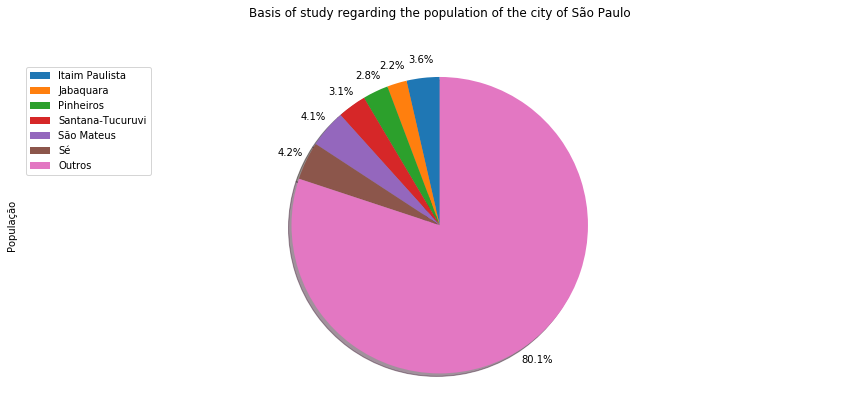

In [8]:
neig_tot_df['População'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            )

# scale the title up by 12% to match pctdistance
plt.title('Basis of study regarding the population of the city of São Paulo', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=neig_tot_df.Borough, loc='upper left') 
# show plot
plt.show()

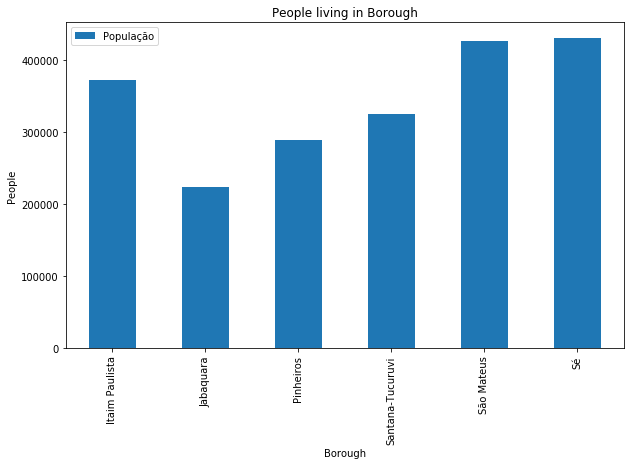

In [9]:
neig_df1 = neig_df[['Borough','População']]
neig_df1.set_index('Borough', inplace=True)

neig_df1.plot(kind='bar', figsize=(10, 6))
plt.title('People living in Borough') # add a title to the histogram
plt.ylabel('People') # add y-label
plt.xlabel('Borough') # add x-label
plt.show()

#### Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'VFH4YF4J21L1HTFLM0XVUW21V2XOQ1SQ1NYHRIGCHABZEJAE' # your Foursquare ID
CLIENT_SECRET = '52PY5FSTYR4XJ3XVVQ4SOXH4GLQ1MJBH4HHDYPHJBF0IQLTE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print(' Foursquare Credentials Defined')

 Foursquare Credentials Defined


<hr>

1 - Borough 
### Sé

##### Getting data from Foursquare

In [11]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['Sé'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['Sé'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues

In [14]:
nearby_venues['Borough'] = 'Sé'
venues_se = nearby_venues
all_venues = nearby_venues
#venues_se.head()

In [15]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_SE = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_SE
cultural_venues_Count_SE = pd.pivot_table(cultural_venues_SE, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_SE
#cultural_venues_SE

categories,Art Gallery,Art Museum,Concert Hall,Cultural Center,History Museum,Music Venue,Plaza,Theater
Borough,2,2,1,6,1,1,1,6


2 - Borough 
### Santana-Tucuruvi

##### Getting data from Foursquare

In [16]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['Santana-Tucuruvi'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['Santana-Tucuruvi'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [17]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

In [18]:
nearby_venues['Borough'] = 'Santana-Tucuruvi'
venues_st = nearby_venues
all_venues = all_venues.append(nearby_venues)
venues_st.tail()

,name,id,categories,lat,lng,Borough
95,Outback Steakhouse,573dff78498ea0b8c7019212,Steakhouse,-23.483351,-46.644936,Santana-Tucuruvi
96,Bio Ritmo,4d276b97888af04d0426bcaf,Gym,-23.482626,-46.644335,Santana-Tucuruvi
97,Pizzaria Monte Verde,4bd391eaa8b3a593c55e6a5f,Pizza Place,-23.523207,-46.642154,Santana-Tucuruvi
98,Coco Bambu,583f68711b36d478b30adef3,Seafood Restaurant,-23.512750,-46.653575,Santana-Tucuruvi
99,Grão Espresso,4d57fb01de8f6dcb23e50591,Café,-23.507119,-46.600528,Santana-Tucuruvi


In [19]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_st = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_st
cultural_venues_Count_st = pd.pivot_table(cultural_venues_st, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_st

categories,Cultural Center,Music Venue,Theater
Borough,1,1,1


3 - Borough 
### Pinheiros

##### Getting data from Foursquare

In [20]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['Pinheiros'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['Pinheiros'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [21]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

In [22]:
nearby_venues['Borough'] = 'Pinheiros'
venues_PN =nearby_venues
all_venues = all_venues.append(nearby_venues)
venues_PN.head()

,name,id,categories,lat,lng,Borough
0,Sede261,5a511417d69ed05523946774,Wine Bar,-23.566272,-46.688749,Pinheiros
1,Napoli Centrale,5762d0d5498e45b44c294c05,Pizza Place,-23.565690,-46.692568,Pinheiros
2,Ambar Cervejas Artesanais,56c79311cd10aa917ff1d5eb,Beer Bar,-23.567264,-46.690404,Pinheiros
3,Izakaya Matsu,54933e45498ecffa717eabda,Japanese Restaurant,-23.566377,-46.689701,Pinheiros
4,Escandinavo,5b37af61d48ec1002c76c691,Scandinavian Restaurant,-23.563618,-46.690248,Pinheiros


In [23]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_pn = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_pn
cultural_venues_Count_pn = pd.pivot_table(cultural_venues_pn, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_pn

categories,Art Gallery,Art Museum,Plaza,Theater
Borough,2,1,3,1


4 - Borough 
### Itaim Paulista

##### Getting data from Foursquare

In [24]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['Itaim Paulista'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['Itaim Paulista'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [25]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

In [26]:
nearby_venues['Borough'] = 'Itaim Paulista'
venues_ip =nearby_venues
all_venues = all_venues.append(nearby_venues)
venues_ip.head()

,name,id,categories,lat,lng,Borough
0,Flex Academia,504416f8d86c6dbc11b8f55e,Gym,-23.509623,-46.382097,Itaim Paulista
1,Burger King,5865a60f45c3ed1e7dd9dc71,Fast Food Restaurant,-23.494154,-46.390150,Itaim Paulista
2,Supermercado Rossi,58378701a6118c60b5d03b34,Supermarket,-23.501462,-46.384776,Itaim Paulista
3,Softness Doceria,50c643ede4b0e2b40df25651,Snack Place,-23.498153,-46.401145,Itaim Paulista
4,Padaria Mandala,4daaff8b6a2303012f199a95,Bakery,-23.505116,-46.397723,Itaim Paulista


In [27]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_ip = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_ip
cultural_venues_Count_ip = pd.pivot_table(cultural_venues_ip, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_ip

categories,Plaza
Borough,1


5 - Borough 
### Jabaquara

##### Getting data from Foursquare

In [28]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['Jabaquara'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['Jabaquara'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [29]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

In [30]:
nearby_venues['Borough'] = 'Jabaquara'
venues_jb =nearby_venues
all_venues = all_venues.append(nearby_venues)
venues_jb.head()

,name,id,categories,lat,lng,Borough
0,Chuletão,4bc2192cf8219c74ea45b410,Brazilian Restaurant,-23.651597,-46.657876,Jabaquara
1,Sodiê Doces,51cb4b17498e70e1f5e040e0,Dessert Shop,-23.651698,-46.659281,Jabaquara
2,Casa do Cigano,51573bc8e4b03dbb55c5fc42,Department Store,-23.642533,-46.644193,Jabaquara
3,Just Fit - Leonardo da Vinci,56d74db8498ed2ca5d28cf42,Gym / Fitness Center,-23.640058,-46.640387,Jabaquara
4,Dona Linda,5123a0d1e4b021660538fc7f,Restaurant,-23.645483,-46.664401,Jabaquara


In [31]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_jb = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_jb
cultural_venues_Count_jb = pd.pivot_table(cultural_venues_jb, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_jb

categories,Music Venue
Borough,1


6 - Borough 
### São Mateus

##### Getting data from Foursquare

In [32]:
neighborhood_latitude = neighbor.lat[neighbor['Borough'].isin(['São Mateus'])].mean()
neighborhood_longitude = neighbor.lng[neighbor['Borough'].isin(['São Mateus'])].mean()

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [33]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

#column formatting
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

In [34]:
nearby_venues['Borough'] = 'São Mateus'
venues_it =nearby_venues
all_venues = all_venues.append(nearby_venues)
venues_it.head()

,name,id,categories,lat,lng,Borough
0,Sorvetes Capricho,4fa40bc0e4b098f42a2c06b7,Ice Cream Shop,-23.594139,-46.488128,São Mateus
1,Qshape Academia,53b5237d498e06cf1e56ad48,Martial Arts Dojo,-23.596814,-46.475840,São Mateus
2,Agutoli's,4f08ec66e4b0ad9c25c64311,Burger Joint,-23.598220,-46.477048,São Mateus
3,Fábrica de Cultura Sapopemba,4e05f31e52b165b7d7a4943f,General Entertainment,-23.614776,-46.485794,São Mateus
4,Feira Livre Sapopemba - Sábado,4ed0482561af476c08778a69,Food Truck,-23.596132,-46.481148,São Mateus


In [35]:
#Selecionando Categorias a serem analisadas
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
cultural_venues_sm = nearby_venues[nearby_venues['categories'].isin(opt)]
cultural_venues_sm
cultural_venues_Count_sm = pd.pivot_table(cultural_venues_sm, values='Borough', columns=['categories'], aggfunc=np.count_nonzero)
cultural_venues_Count_sm

categories,Theater
Borough,1


<hr>

## 4 - Discussion / Conclusion

#### Cultural places by districts

<BR><i>
When we analyze the distribution of culture and entertainment establishments by district, it is easy to identify the large concentration in some districts of the city, leaving the outskirts of the city lacking in terms of these establishments.<BR>
We note that the population distribution does not differ so much compared to the differences in the types of sites analyzed.
</i><BR>
    

In [36]:
opt =  ['Cultural Center','Theater','Music Venue','Plaza','Art Gallery','Art Museum','Concert Hall','History Museum'] 
all_venues = all_venues[all_venues['categories'].isin(opt)]
all_venues.to_csv(r'all_venue.csv')

#### Location Venues

In [37]:
# create map of New York using latitude and longitude values
map_sampa1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(all_venues['lat'], all_venues['lng'], all_venues['name'], all_venues['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sampa)  
    
map_sampa

In [38]:
table = pd.pivot_table(all_venues, values='Borough', #index=['Borough'],
                       columns=['categories'], aggfunc=np.count_nonzero)
#table
table2 = pd.pivot_table(all_venues, values='categories', #index=['Borough'],
                        columns=['Borough'], aggfunc=np.count_nonzero)
#table2
neig_df1 = neig_df[['Borough','População']]
neig_df1.set_index('Borough', inplace=True)
#neig_df1.reindex
#neig_df1

Text(0.5, 0, 'Borough')

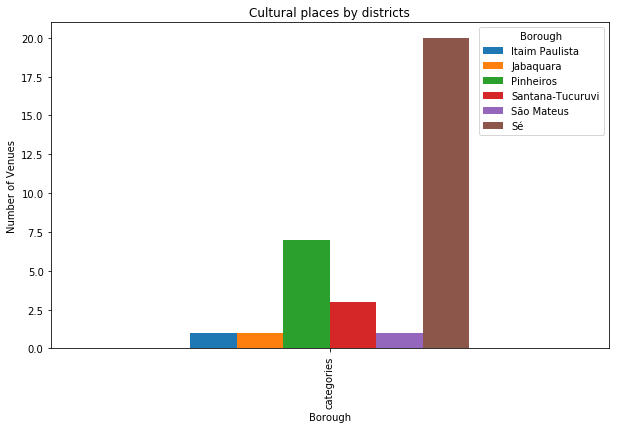

In [39]:
table2.plot(kind='bar', figsize=(10, 6))
plt.title('Cultural places by districts') # add a title to the histogram
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Borough') # add x-label

<hr>
<i>This work was made by Fernando Luiz Baptista Pinto </i>